#  Storytelling With Data 


## Contents: 
1. Introduction
2. Acknowledgments
3. Importing libraries
4. Loading our dataset and exploring features
5. Data wrangling
6. Exploratory data analysis 
  
___


## Introduction: 
In this notebook we will go through a dataset containing U.S car accidents between 2016 and 2021. The dataset is provided by [Sobhan Moosavi](https://smoosavi.org/datasets/us_accidents "U.S car accidents, by Sobhan Moosavi"), and has been continuously collected since February 2016 using several data providers.

The goal of this project is to explore the dataset, uncover trends and themes,  visualize important aspects of the data in an appealing way, and be able to weave everything into a coherent and engaging story that is understood by everyone, regardless of their technical background.

___


## Acknowledgments: 
Please cite the following papers if you use this dataset:

- Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, arXiv preprint arXiv:1906.05409 (2019).

- Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. “Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights.” In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.


___

## Importing libraries:




In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime



## Loading our dataset and exploring features



In [2]:
# loading our csv file into a dataframe 'df'
df = pd.read_csv('/Users/hamzaalbustanji/Documents/Data/US_Accidents_Dec21_updated.csv')
df = df.reset_index()


In [3]:
df.head()

,index,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,...,False,False,False,False,False,False,Night,Night,Night,Night
1,1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,...,False,False,False,False,False,False,Night,Night,Night,Night
2,2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,...,False,False,False,False,False,False,Night,Night,Night,Day
3,3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,...,False,False,False,False,False,False,Night,Night,Day,Day
4,4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   index                  int64  
 1   ID                     object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Number                 float64
 12  Street                 object 
 13  Side                   object 
 14  City                   object 
 15  County                 object 
 16  State                  object 
 17  Zipcode                object 
 18  Country                object 
 19  Timezone               object 
 20  Airport_Code           object 
 21  Weather_Timestamp      object 
 22  Temperature(F)    

Column | Definition
--- | -----------
ID | This is a unique identifier of the accident record.	
Severity | Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).
Start_Time | Shows start time of the accident in local time zone.	
End_Time | Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.
Start_Lat | The Metacritic user score for the film
Start_Lng | The IMDb user score for the film
End_Lat | The number of user votes the film had on Metacritic
End_Lng | The number of user votes the film had on IMDb
Distance(mi) |The length of the road extent affected by the accident.	
Description |Shows natural language description of the accident.	
Number |Shows the street number in address field.	
Street |Shows the street name in address field.	
Side |Shows the relative side of the street (Right/Left) in address field.	
City |Shows the city in address field.	
County |Shows the county in address field.	
County |	Shows the county in address field.	Yes
State |	Shows the state in address field.	Yes
Zipcode |	Shows the zipcode in address field.	Yes
Country |	Shows the country in address field.	Yes
Timezone | Shows timezone based on the location of the accident (eastern, central, etc.).	Yes
Airport_Code | Denotes an airport-based weather station which is the closest one to location of the accident.	Yes
Weather_Timestamp | Shows the time-stamp of weather observation record (in local time).	Yes
Temperature(F)| Shows the temperature (in Fahrenheit).	Yes
Wind_Chill(F) |Shows the wind chill (in Fahrenheit).	Yes
Humidity(%) |	Shows the humidity (in percentage).	Yes
Pressure(in) | Shows the air pressure (in inches).	Yes
Visibility(mi) | Shows visibility (in miles).	Yes
Wind_Direction | Shows wind direction.	Yes
Wind_Speed(mph) | Shows wind speed (in miles per hour).	Yes
Precipitation(in) | Shows precipitation amount in inches, if there is any.	Yes
Weather_Condition | Shows the weather condition (rain, snow, thunderstorm, fog, etc.)	Yes
Amenity	| A POI annotation which indicates presence of amenity in a nearby location.	No
Bump | A POI annotation which indicates presence of speed bump or hump in a nearby location.	No
Crossing | A POI annotation which indicates presence of crossing in a nearby location.	No
Give_Way | A POI annotation which indicates presence of give_way in a nearby location.	No
Junction | A POI annotation which indicates presence of junction in a nearby location.	No
No_Exit |	A POI annotation which indicates presence of no_exit in a nearby location.	No
Railway | A POI annotation which indicates presence of railway in a nearby location.	No
Roundabout | A POI annotation which indicates presence of roundabout in a nearby location.	No
Station | A POI annotation which indicates presence of station in a nearby location.	No
Stop | A POI annotation which indicates presence of stop in a nearby location.	No
Traffic_Calming | A POI annotation which indicates presence of traffic_calming in a nearby location.	No
Traffic_Signal | A POI annotation which indicates presence of traffic_signal in a nearby loction.	No
Turning_Loop | A POI annotation which indicates presence of turning_loop in a nearby location.	No
Sunrise_Sunset | Shows the period of day (i.e. day or night) based on sunrise/sunset.	Yes
Civil_Twilight | Shows the period of day (i.e. day or night) based on civil twilight.	Yes
Nautical_Twilight | Shows the period of day (i.e. day or night) based on nautical twilight.	Yes
Astronomical_Twilight | Shows the period of day (i.e. day or night) based on astronomical twilight.





A more detailed description of each feature is available <a href="https://smoosavi.org/datasets/us_accidents">here</a>


___
## Data wrangling



In [5]:
# dropping columns of no interest 

df['ID'] = df['index']
df = df.drop(['index','Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng','Number'],axis = 1)


In [6]:
# extracting the year and month of each accident and saving them into seperate columns

df ['Year'] = pd.DatetimeIndex(df['Start_Time']).year
df ['Month'] = pd.DatetimeIndex(df['Start_Time']).month
df.head()

,ID,Severity,Start_Time,End_Time,Distance(mi),Description,Street,Side,City,County,...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month
0,0,3,2016-02-08 00:37:08,2016-02-08 06:37:08,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,Outerbelt E,R,Dublin,Franklin,...,False,False,False,False,Night,Night,Night,Night,2016,2
1,1,2,2016-02-08 05:56:20,2016-02-08 11:56:20,0.747,At OH-4/OH-235/Exit 41 - Accident.,I-70 E,R,Dayton,Montgomery,...,False,False,False,False,Night,Night,Night,Night,2016,2
2,2,2,2016-02-08 06:15:39,2016-02-08 12:15:39,0.055,At I-71/US-50/Exit 1 - Accident.,I-75 S,R,Cincinnati,Hamilton,...,False,False,False,False,Night,Night,Night,Day,2016,2
3,3,2,2016-02-08 06:51:45,2016-02-08 12:51:45,0.123,At Dart Ave/Exit 21 - Accident.,I-77 N,R,Akron,Summit,...,False,False,False,False,Night,Night,Day,Day,2016,2
4,4,3,2016-02-08 07:53:43,2016-02-08 13:53:43,0.500,At Mitchell Ave/Exit 6 - Accident.,I-75 S,R,Cincinnati,Hamilton,...,False,False,False,False,Day,Day,Day,Day,2016,2


In [7]:
# seperating our datframe into smaller dataframes that contain only similar attributes

# this is a timeseries datafram which we'll use to explore the accidents' relationship with time and different seasons
df_timeseries = df[['Year','Month']]

# a dataframe containing the description of each accident
df_description = df [['Severity', 'Start_Time', 'End_Time', 'Distance(mi)','Description']]

# a dataframe containing the location/ time zone of each accident
df_geogrophy = df[['Street', 'Side', 'City', 'County', 'State', 'Zipcode','Country',
                    'Timezone', 'Airport_Code']]
# a dataframe containing the weather conditions for each accident
df_weather = df[['Weather_Timestamp','Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
                'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
                'Precipitation(in)', 'Weather_Condition']]

# a dataframe containing the colse-by amenities/ bumps..etc
df_location = df[['Amenity', 'Bump', 'Crossing',
                'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
                'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']]

In [8]:
import warnings
warnings.simplefilter('ignore')

In [9]:
# crating a count column
df_timeseries.loc[:,'Count'] = 1
df_timeseries.head()

,Year,Month,Count
0,2016,2,1
1,2016,2,1
2,2016,2,1
3,2016,2,1
4,2016,2,1


In [10]:
# grouping by month and year to display the number of accidents each month of each year
df_ts_gb = df_timeseries.groupby(['Year','Month']).sum()
df_ts_gb

Count
Year Month        
2016 1           7
     2         546
     3        2398
     4        5904
     5        7148
...            ...
2021 8      117710
     9      132475
     10     144466
     11     185363
     12     265747

[72 rows x 1 columns]

In [11]:
# re-setting index to better handle the dataframe
df_ts_gb2 = df_ts_gb.reset_index()
df_ts_gb2

,Year,Month,Count
0,2016,1,7
1,2016,2,546
2,2016,3,2398
3,2016,4,5904
4,2016,5,7148
...,...,...,...
67,2021,8,117710
68,2021,9,132475
69,2021,10,144466
70,2021,11,185363


___

## Exploratory data analysis

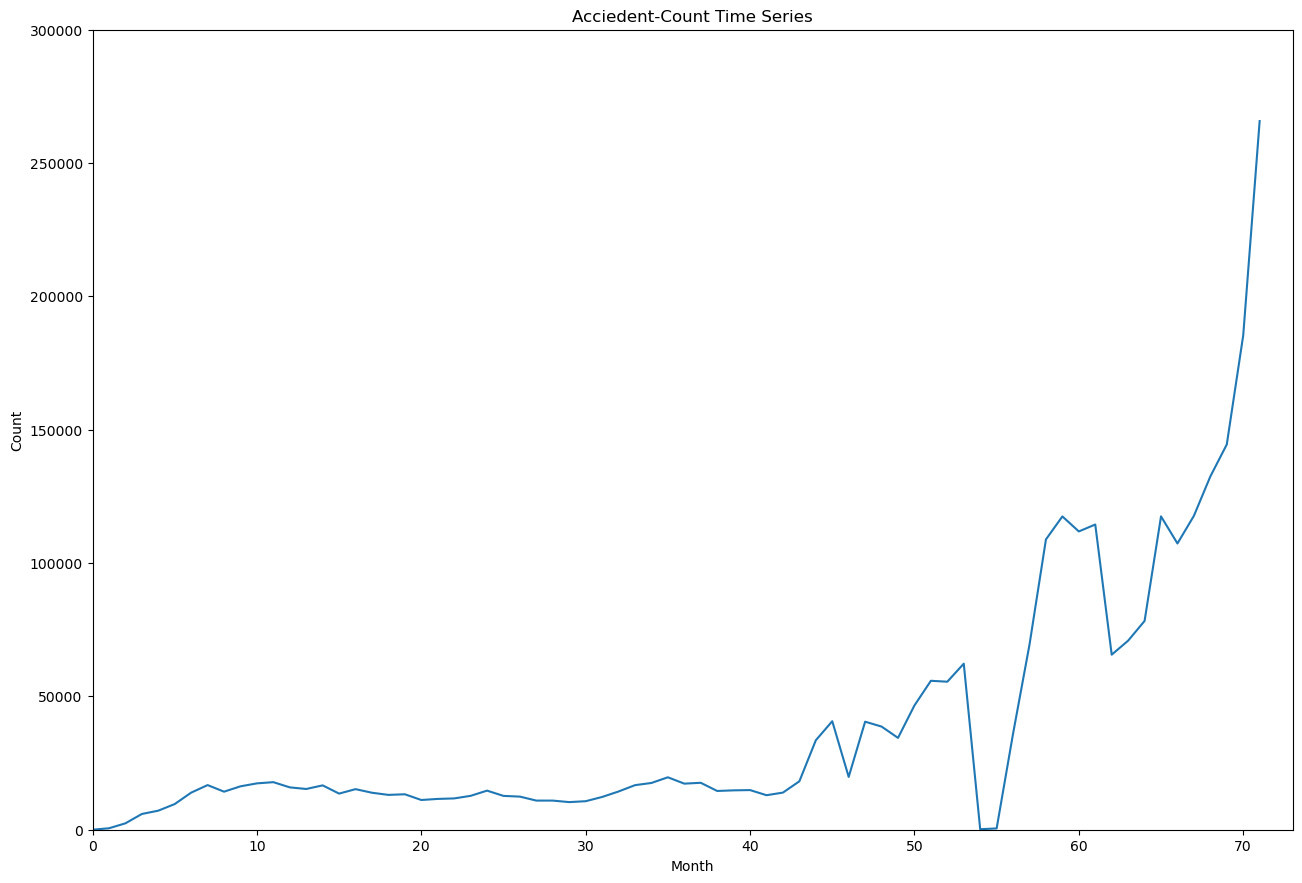

In [18]:
# a timeseries graph of the number of accidents per month
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])
ax.plot(df_ts_gb2['Count'])
ax.set_ylabel('Count')
ax.set_xlabel('Month')
ax.set_title('Acciedent-Count Time Series')
ax.set_ylim(0,300000)
ax.set_xlim(0,73);




This graph shows the count of accidents each month. At first glance, it might not look that interesting, but I believe there are a few things worth investigating further here. Like the abrupt drop in accidents, all the way to zero, that occurs sometime in 2020. Was this the Coronavirus lockdown? Well, let's check this. According to the <a href="https://www.cdc.gov/museum/timeline/covid19.html">CDC</a> website, the Coronavirus lockdowns started taking place in the United States in March 2020, which would be month 51 in our dataset. 

___


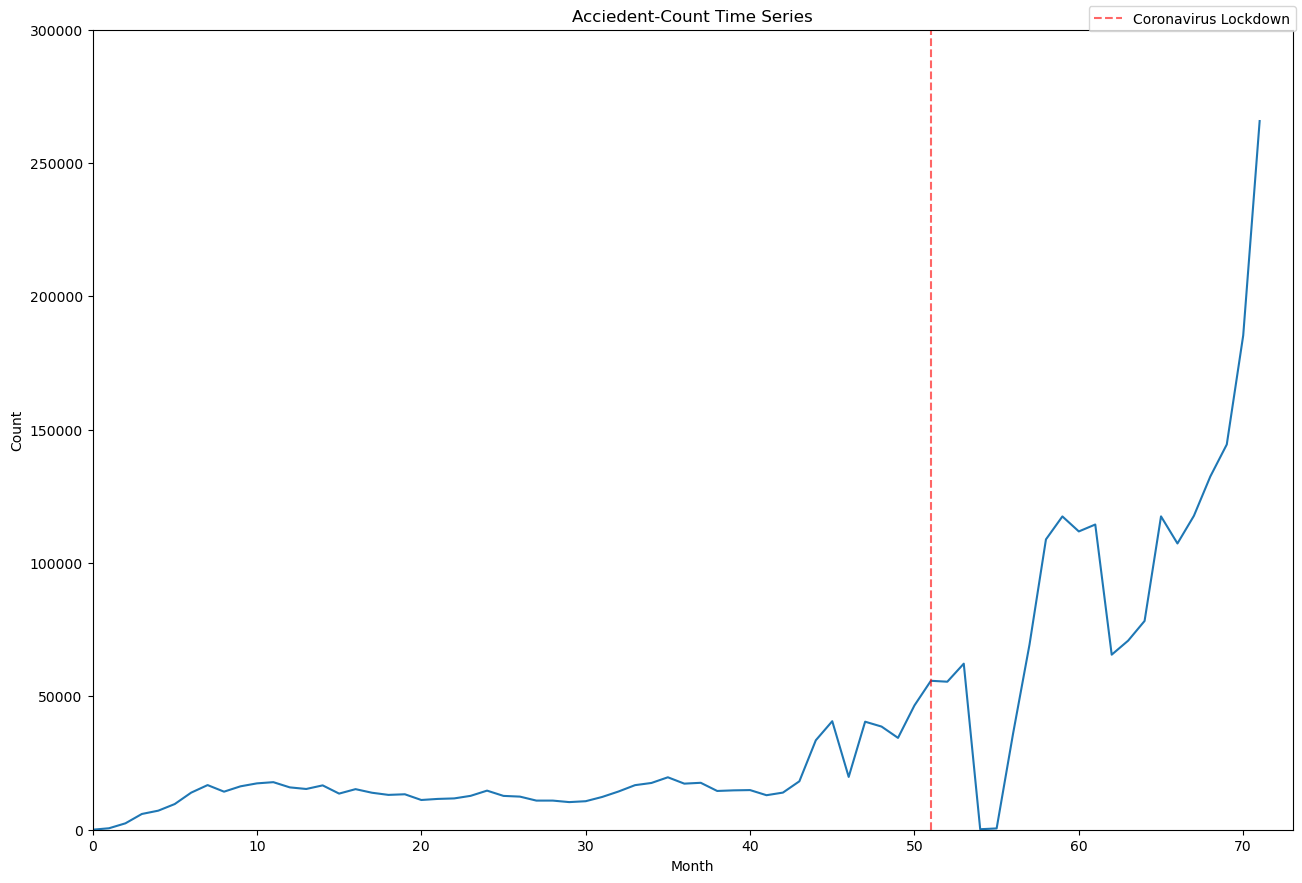

In [13]:
# adding a vertical line to our graph to show when the Lockdowns took place

fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])
ax.plot(df_ts_gb2['Count'])
ax.set_ylabel('Count')
ax.set_xlabel('Month')
ax.set_title('Acciedent-Count Time Series')
ax.set_ylim(0,300000)
ax.set_xlim(0,73)
ax.axvline(x = 51, color = 'red', linestyle = '--', label = 'Coronavirus Lockdown', alpha=0.6)
fig.legend();



This graph looks interesting. The sharp dip that brought the accident count down to zero does correspond with the Coronavirus lockdowns, but the increase in the number of accidents after the lockdowns seems high. Let's take a closer look.

___

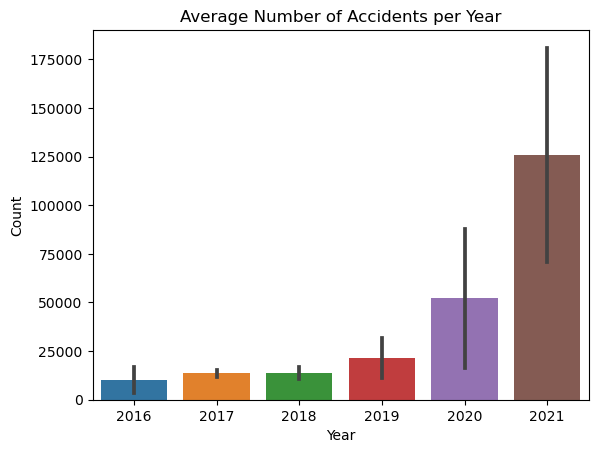

In [14]:
sns.barplot(x='Year',y='Count',data=df_ts_gb2,estimator=np.mean,ci='sd')
plt.title('Average Number of Accidents per Year');

In [15]:
# average number of accidents per year and the rate of change from year to year

yr = np.arange(1,13)
yr2016 = np.arange(0,12)
yr2017 = np.arange(12,24)
yr2018 = np.arange(24,36)
yr2019 = np.arange(36,48)
yr2020 = np.arange(48,60)
yr2021 = np.arange(60,72)

avg_2016 = df_ts_gb2.iloc[yr2016]['Count'].sum()/12
avg_2017 = df_ts_gb2.iloc[yr2017]['Count'].sum()/12
avg_2018 = df_ts_gb2.iloc[yr2018]['Count'].sum()/12
avg_2019 = df_ts_gb2.iloc[yr2019]['Count'].sum()/12
avg_2020 = df_ts_gb2.iloc[yr2020]['Count'].sum()/12
avg_2021 = df_ts_gb2.iloc[yr2021]['Count'].sum()/12

rt_16_17 = round(((avg_2017-avg_2016)/avg_2016)*100)
rt_17_18 = round(((avg_2018-avg_2017)/avg_2017)*100)
rt_18_19 = round(((avg_2019-avg_2018)/avg_2018)*100)
rt_19_20 = round(((avg_2020-avg_2019)/avg_2019)*100)
rt_20_21 = round(((avg_2021-avg_2020)/avg_2020)*100)

print('\
\n\
The rates of change in the average number of  acidents per year were:\
\n\
\nfrom 2016 to 2017 there was an increase of {0}% \n\
\n\
from 2017 to 2018 was the only year where the change was actually negative, but very small: {1}%\n\
\n\
from 2018 to 2019 the increase in accidents was {2}% \n\
\n\
from 2019 to 2020 the increase was {3}%\n\
\n\
from 2020 to 2021 the increase was {4}%'.format(rt_16_17,rt_17_18,rt_18_19,rt_19_20,rt_20_21))


The rates of change in the average number of  acidents per year were:

from 2016 to 2017 there was an increase of 34% 

from 2017 to 2018 was the only year where the change was actually negative, but very small: 0%

from 2018 to 2019 the increase in accidents was 58% 

from 2019 to 2020 the increase was 142%

from 2020 to 2021 the increase was 142%



These numbers are alarming. The rates of change between 2016 and 2019 averaged around 30% per year, which sounds reasonable. What raises eyebrows here is the increase in accidents between 2019 and 2020, and between 2020 and 2021. Both yearly spans saw an increase of 142%. This is a huge increase, and it occurred two years in a row. This may be due to a number of reasons: </br>

- Inaccuracies in our data: are our data complete? or are there missing values in the earlier years? also, did we add methods of data collection along the way, or are the data collection methods consistent for all years?</br>
- Assuming our data are valid, did the population of drivers change? If so, how? Did the number of all drivers increase, or did the number of a specific sub-group of drivers change?</br>
- Did the pandemic play a role? during the Coronavirus lockdown, due to health concerns, DMV offices were incentivized to issue driving licenses without administering the usual examinations, did this play a role? 
</br>

These are a few questions that come to mind here, unfortunately, due to the lack of data, and limitations to the scope of this project, we can't investigate these questions any further. 

___


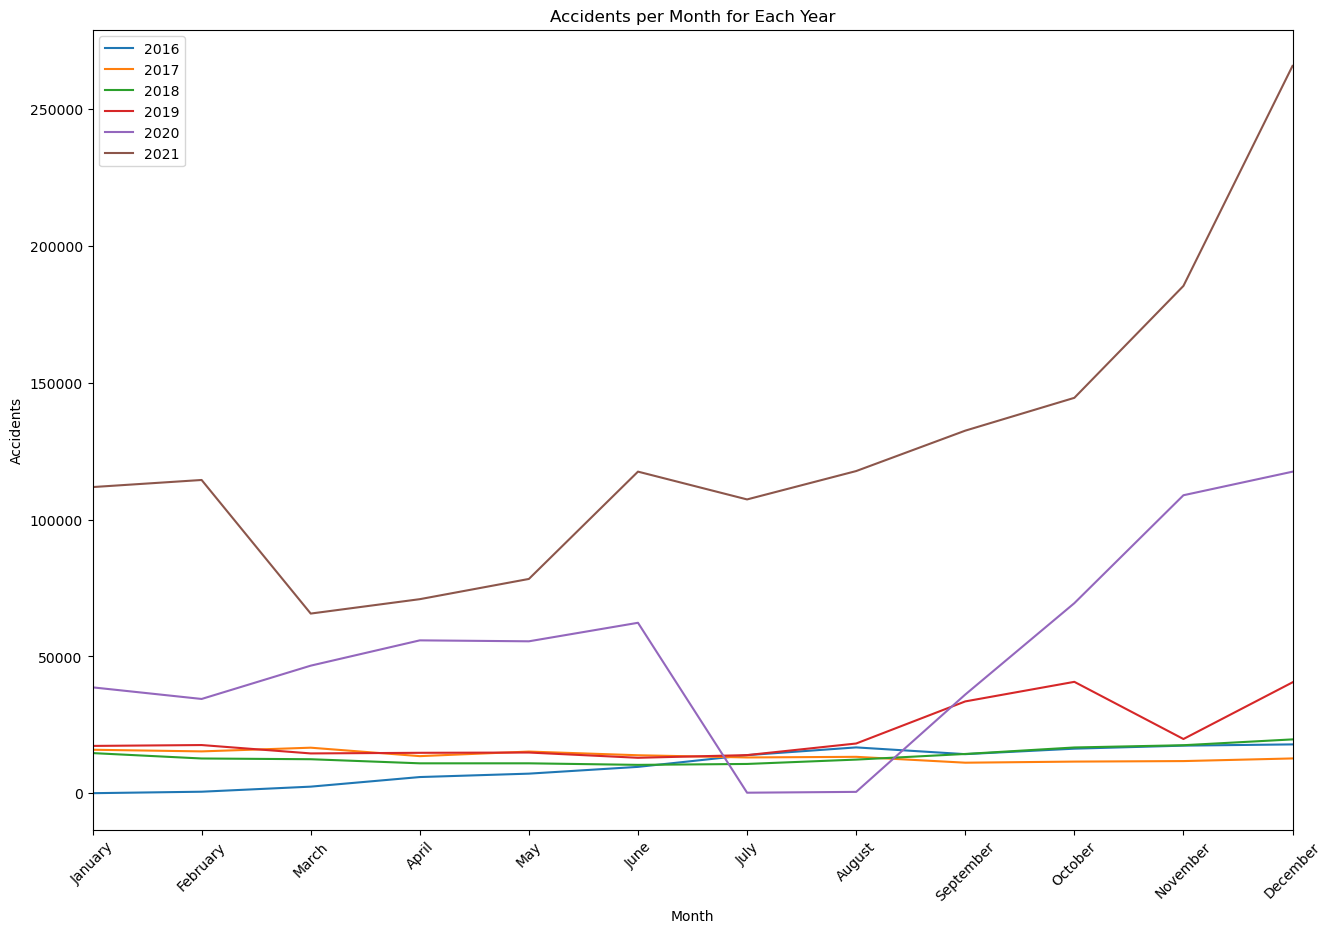

In [16]:
# creating a seperate line graph for each year to compare them against each other

fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])
ax.set_xticks(np.arange(1, 13, step=1),['January', 'February', 'March','April','May',
                                        'June','July','August','September','October','November',
                                        'December'],rotation = 45)
ax.plot(yr,df_ts_gb2.iloc[yr2016]['Count'],label = '2016')
ax.plot(yr,df_ts_gb2.iloc[yr2017]['Count'],label = '2017')
ax.plot(yr,df_ts_gb2.iloc[yr2018]['Count'],label = '2018')
ax.plot(yr,df_ts_gb2.iloc[yr2019]['Count'],label = '2019')
ax.plot(yr,df_ts_gb2.iloc[yr2020]['Count'],label = '2020')
ax.plot(yr,df_ts_gb2.iloc[yr2021]['Count'],label = '2021')
ax.set_xlabel('Month')
ax.set_ylabel('Accidents')
ax.set_xlim(1,12)
plt.title('Accidents per Month for Each Year')
ax.legend();



This graph helps us visualize the difference between the years 2016-2018 and 2019-2021. We can see from the visualization how the years 2016, 2017, and 2018 are clustered together and seem very similar, and while the year 2019 at the start is uniform with the previous three, it experiences a jump at the end. The years 2020 and 2021 are sporadic, but we can see the increase in accidents by the upward shift in the graph of each of the two years. </br>
Now, let's explore when accidents occur the most. Is there a particular month or season when accidents jump in number?
___

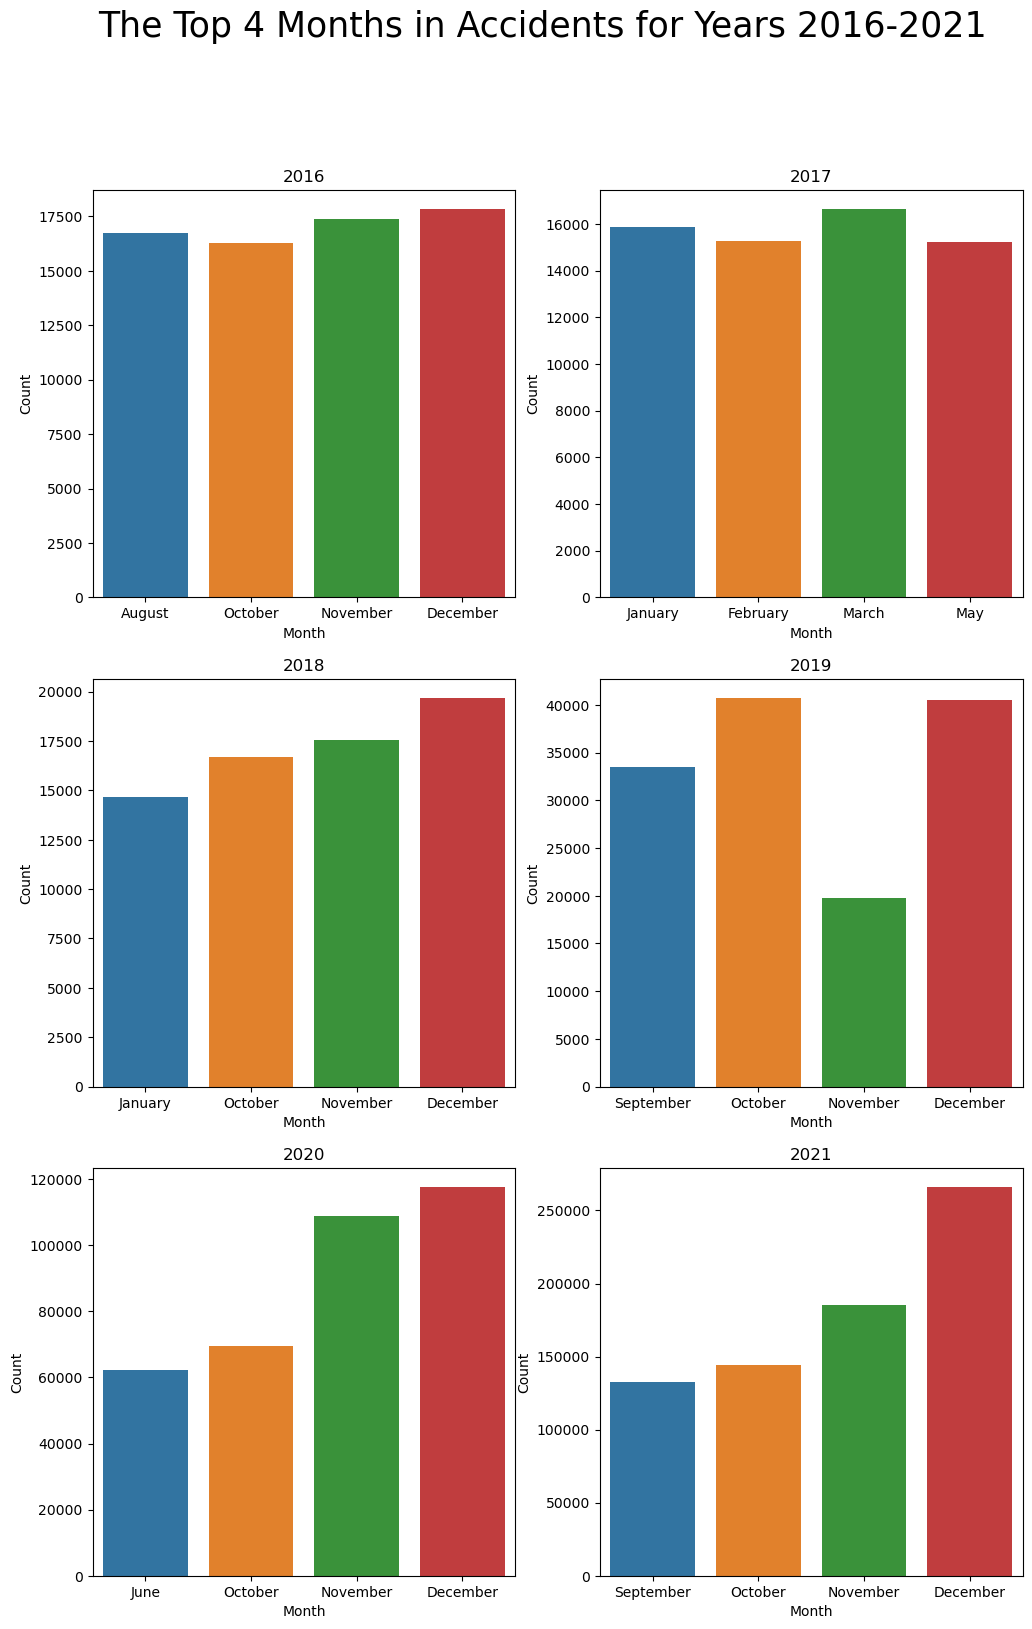

In [17]:
# bargraph for the top 4 months in accidents for the years 2016 - 2021
fig,axes = plt.subplots(nrows=3, ncols=2, figsize = (12,18))
fig.suptitle('The Top 4 Months in Accidents for Years 2016-2021', fontsize = 25)
axes[0,0].set_title('2016')
axes[0,1].set_title('2017')
axes[1,0].set_title('2018')
axes[1,1].set_title('2019')
axes[2,0].set_title('2020')
axes[2,1].set_title('2021')
sns.barplot( data = df_ts_gb2.iloc[yr2016].sort_values(by='Count', ascending = False)[0:4],
            x = 'Month', y = 'Count', ax =axes[0,0]).set_xticklabels(['August','October','November','December'])

sns.barplot( data = df_ts_gb2.iloc[yr2017].sort_values(by='Count', 
                                                            ascending = False)[0:4], 
            x = 'Month', y = 'Count', ax = axes[0,1]).set_xticklabels(['January','February','March','May'])

sns.barplot( data = df_ts_gb2.iloc[yr2018].sort_values(by='Count', ascending = False)[0:4],
            x = 'Month', y = 'Count', ax = axes[1,0]).set_xticklabels(['January','October','November','December'])

sns.barplot( data = df_ts_gb2.iloc[yr2019].sort_values(by='Count', ascending = False)[0:4],
            x = 'Month', y = 'Count', ax = axes[1,1]).set_xticklabels(['September','October','November','December'])

sns.barplot( data = df_ts_gb2.iloc[yr2020].sort_values(by='Count',ascending = False)[0:4],
            x = 'Month', y = 'Count', ax = axes[2,0]).set_xticklabels(['June','October','November','December'])

sns.barplot( data = df_ts_gb2.iloc[yr2021].sort_values(by='Count', ascending = False)[0:4],
            x = 'Month', y = 'Count', ax = axes[2,1]).set_xticklabels(['September','October','November','December']);



The answer to our previous question seems to be yes. December is, by far, the month when accidents occur the most, it was the highest month in 5 out of 6 years, with 2017 being the exception. </br>
In general, the months of October, November, and December made it to the top 4 in 5 out of the 6 years, with 2017 being the exception again. This may be due to the weather condition during these months. Another trend that seems to persist is the year 2017 being an oddball, it was the only year that experienced a decrease in accidents, although a minuscule one, and here it is the only year that doesn't share the same peak season as the other years.
___